In [1]:
import pandas as pd
import numpy as np
# import matplotlib
# matplotlib.use('Qt5Agg') #for interactive plot backend
import matplotlib.pyplot as plt
import mne
from mne.time_frequency import psd_array_welch
from scipy.signal import stft
from scipy.signal import welch
from mne.preprocessing import ICA

### Load interval_marker data

In [2]:
# Load the marker CSV file
marker_df = pd.read_csv('First Trail_EPOCX_237738_2024.09.23T15.01.39+05.30_intervalMarker.csv')
marker_df

,latency,duration,type,marker_value,key,timestamp,marker_id
0,3.720729,19.992604,Eyes_Opened,1,-1,1.727084e+09,1
1,28.878264,20.001177,Eyes_Closed,3,-1,1.727084e+09,2
2,58.112798,0.000000,lab_start,10,10,1.727084e+09,3
3,62.659809,0.000000,lab_start,10,10,1.727084e+09,4
4,69.980898,0.000000,eyes_open,32,32,1.727084e+09,5
5,81.903065,0.000000,eyes_open,32,32,1.727084e+09,6
6,175.227291,0.000000,eyes_open,32,32,1.727084e+09,7
7,220.871949,0.000000,eyes_open,32,32,1.727084e+09,8
8,326.219690,0.000000,eye_close,31,31,1.727084e+09,9
9,381.200075,0.000000,reading_ques,109,109,1.727084e+09,10


### Loading the EEG data

In [3]:
eeg_data = pd.read_csv('First Trail_EPOCX_237738_2024.09.23T15.01.39+05.30.mc.pm.fe.bp.csv',skiprows=1,header=0)
print(eeg_data['MarkerValueInt'].value_counts())
eeg_data_df = eeg_data[['Timestamp', 'MarkerValueInt', 'EEG.Counter', 'EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 
                        'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 
                        'EEG.F8', 'EEG.AF4']]
eeg_data_df = eeg_data_df.rename(columns={'Timestamp': 'timestamp'})
eeg_data_df.head(4)

MarkerValueInt
109.0    19
110.0    19
32.0      4
1.0       2
3.0       2
10.0      2
31.0      2
Name: count, dtype: int64


,timestamp,MarkerValueInt,EEG.Counter,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,1.727084e+09,NaN,27.0,4331.922852,4295.512695,4340.000000,4332.948730,4293.205078,4286.538574,4295.641113,4293.589844,4279.358887,4270.384766,4498.333496,4497.692383,4426.410156,4494.487305
1,1.727084e+09,NaN,28.0,4335.000000,4298.333496,4341.666504,4335.641113,4292.179688,4289.615234,4296.153809,4295.512695,4281.410156,4276.282227,4505.897461,4503.333496,4435.641113,4500.384766
2,1.727084e+09,NaN,29.0,4337.563965,4303.077148,4342.948730,4339.487305,4292.820313,4291.025879,4296.666504,4298.461426,4283.077148,4281.153809,4514.487305,4509.358887,4443.846191,4506.922852
3,1.727084e+09,NaN,30.0,4339.743652,4307.051270,4344.102539,4342.179688,4293.846191,4288.077148,4296.666504,4301.666504,4284.487305,4283.974121,4521.666504,4513.333496,4447.948730,4512.051270


### Filling MarkerValueInt column in dataframe with previous Value

In [4]:
eeg_data_df['MarkerValueInt'] = eeg_data_df['MarkerValueInt'].ffill()
eeg_data_df['MarkerValueInt'].value_counts()

MarkerValueInt
32.0     65634
110.0    20599
109.0    18770
31.0     16593
3.0       7488
1.0       6444
10.0      3040
Name: count, dtype: int64

### Group data based on MarkerValue

In [5]:
grouped_eeg_data = eeg_data_df.groupby('MarkerValueInt')

### ReadingText data

In [6]:
reading_text_data = grouped_eeg_data.get_group(32)
print(reading_text_data.shape)
reading_text_data.info()

(65634, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 65634 entries, 17925 to 83558
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       65634 non-null  float64
 1   MarkerValueInt  65634 non-null  float64
 2   EEG.Counter     65634 non-null  float64
 3   EEG.AF3         65634 non-null  float64
 4   EEG.F7          65634 non-null  float64
 5   EEG.F3          65634 non-null  float64
 6   EEG.FC5         65634 non-null  float64
 7   EEG.T7          65634 non-null  float64
 8   EEG.P7          65634 non-null  float64
 9   EEG.O1          65634 non-null  float64
 10  EEG.O2          65634 non-null  float64
 11  EEG.P8          65634 non-null  float64
 12  EEG.T8          65634 non-null  float64
 13  EEG.FC6         65634 non-null  float64
 14  EEG.F4          65634 non-null  float64
 15  EEG.F8          65634 non-null  float64
 16  EEG.AF4         65634 non-null  float64
dtypes: float64(17)
memor

### Creating Info and Raw data

In [7]:
sampling_rate = 256
ch_names = ['EEG.AF3','EEG.F7','EEG.F3','EEG.FC5','EEG.T7','EEG.P7','EEG.O1','EEG.O2','EEG.P8','EEG.T8','EEG.FC6','EEG.F4','EEG.F8','EEG.AF4']
clean_ch_names = [ch.replace('EEG.', '') for ch in ch_names]
clean_ch_names

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [8]:
n_channels = len(clean_ch_names)
n_channels
reading_text_data2 = reading_text_data.iloc[:,3:17].to_numpy().T
reading_text_data2.shape

(14, 65634)

In [9]:
info = mne.create_info(clean_ch_names, sfreq=sampling_rate, ch_types=['eeg']*n_channels)
raw = mne.io.RawArray(reading_text_data2, info)
raw.set_eeg_reference('average', projection=True)
print(reading_text_data2.shape)  # Should be (n_channels, n_times)
print(len(ch_names))
print(raw.info)

Creating RawArray with float64 data, n_channels=14, n_times=65634
    Range : 0 ... 65633 =      0.000 ...   256.379 secs
Ready.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
(14, 65634)
14
<Info | 8 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: Average EEG reference: off
 sfreq: 256.0 Hz
>


In [10]:
plt.ion()  # Interactive mode
standard_1020_montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(standard_1020_montage)
raw.plot(scalings='auto')
raw_filtered = raw.copy().filter(7,45,verbose=False);

Using qt as 2D backend.


In [11]:
raw_filtered.plot(scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\himas\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


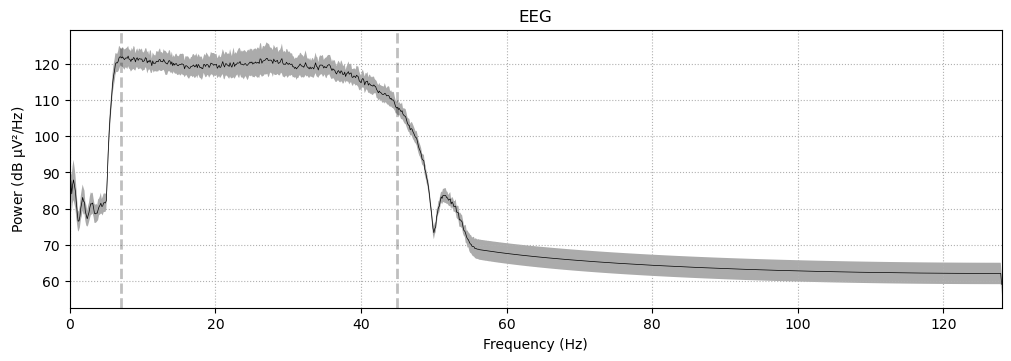

In [12]:
raw_filtered.plot_psd(average=True);

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\himas\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


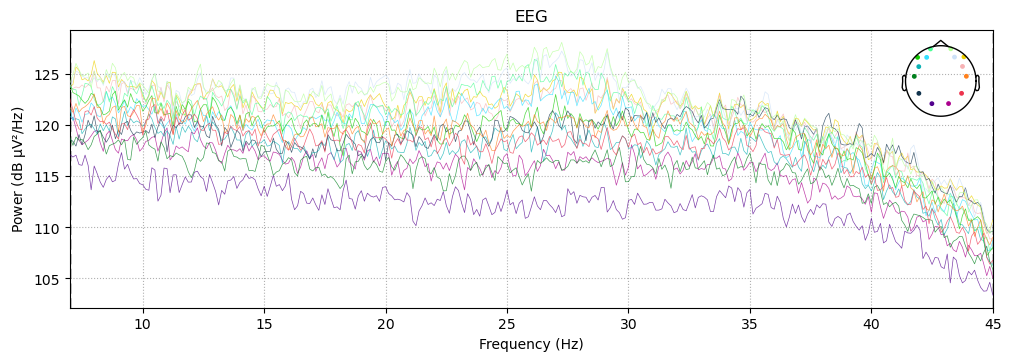

In [13]:
raw_filtered.compute_psd(fmin=7, fmax=45).plot();

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\himas\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


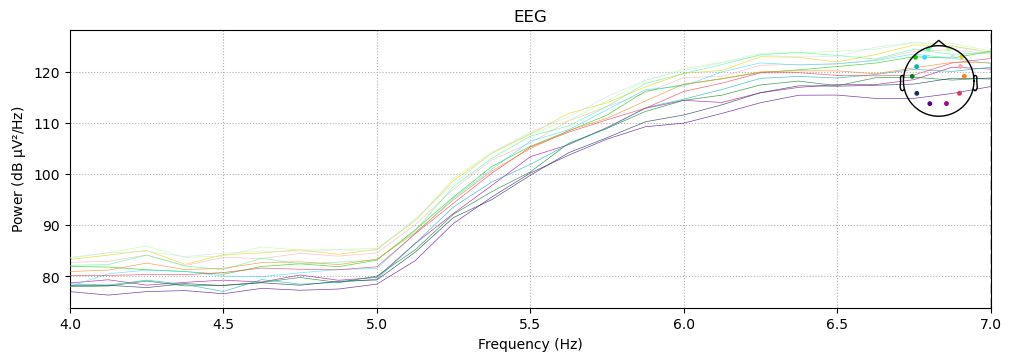

In [14]:
raw_filtered.compute_psd(fmin=4,fmax=7).plot();

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\himas\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


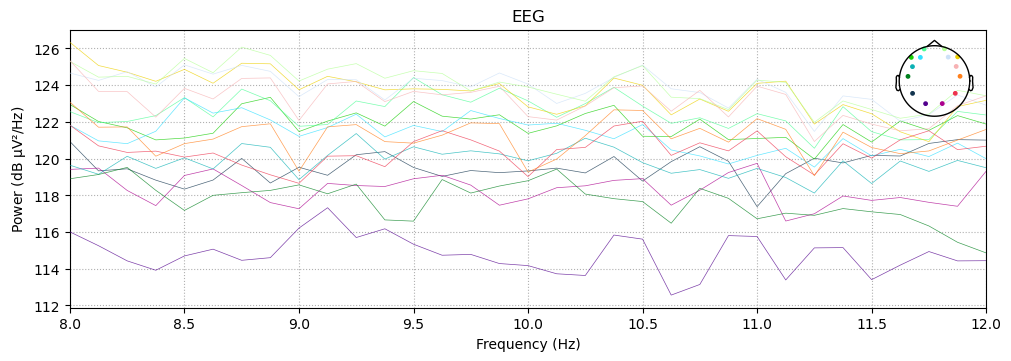

In [15]:
raw_filtered.compute_psd(fmin=8,fmax=12).plot();

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\himas\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


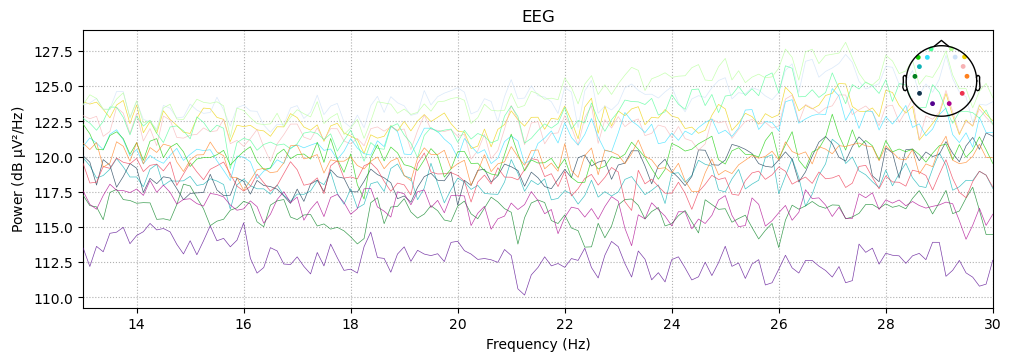

In [16]:
raw_filtered.compute_psd(fmin=13,fmax=30).plot();

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\himas\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


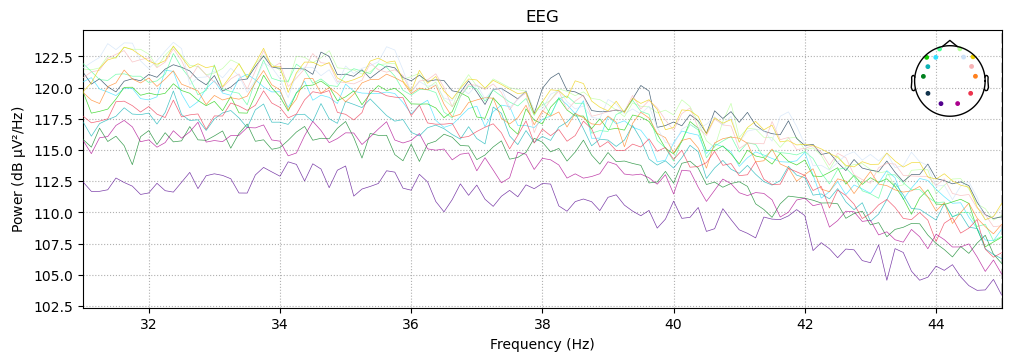

In [17]:
raw_filtered.compute_psd(fmin=31,fmax=45).plot();

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Computing Infomax ICA


C:\Users\himas\AppData\Local\Temp\ipykernel_16428\4163959170.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 3.2s.


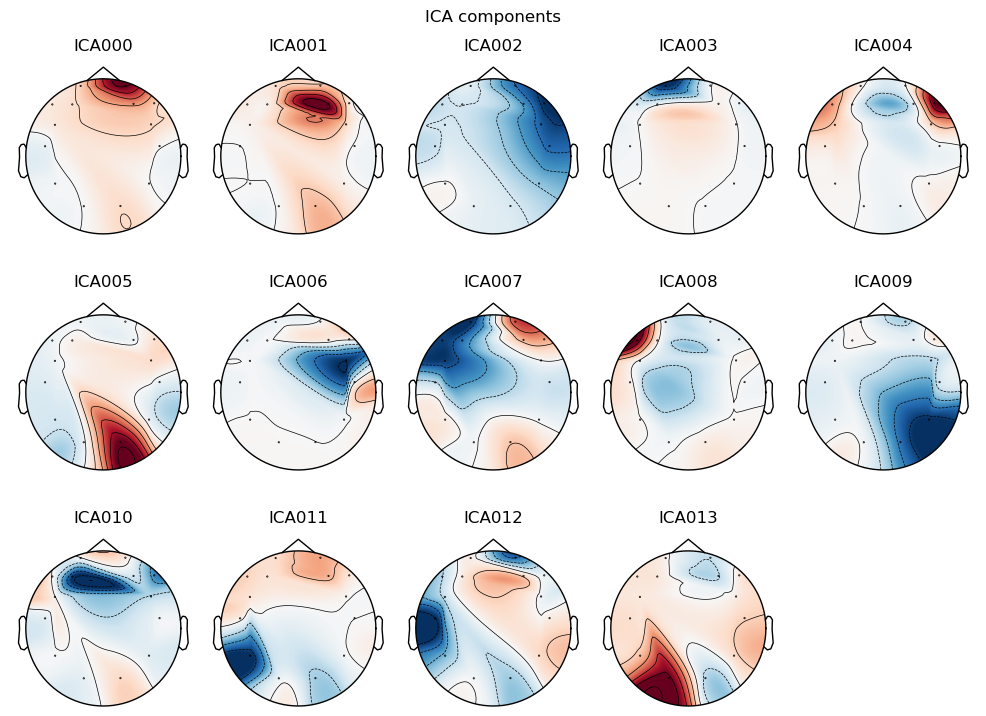

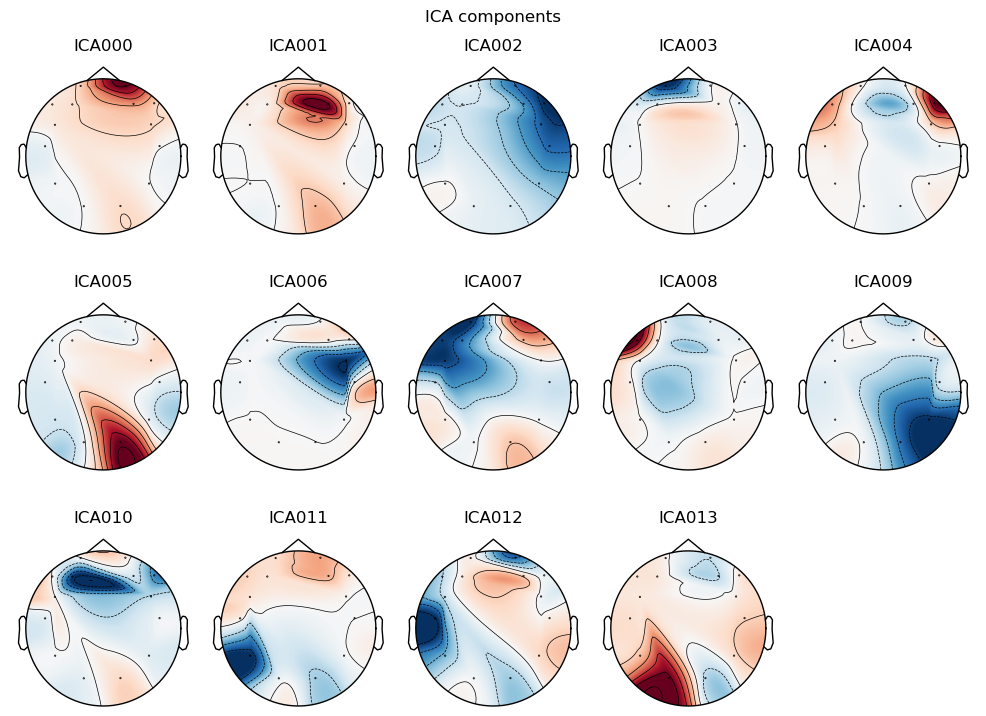

In [18]:
ica = ICA(n_components=14, method='infomax', random_state=97)
ica.fit(raw)
ica.plot_components()

### Epochs

In [19]:
marker_values = reading_text_data['MarkerValueInt'].values.astype(int)
marker_indices = np.where(marker_values != 0)[0]
print(marker_values)
print(marker_indices)
print(marker_indices.shape)
marker_values.shape

[32 32 32 ... 32 32 32]
[    0     1     2 ... 65631 65632 65633]
(65634,)


(65634,)

In [21]:
stim_channel = np.zeros(len(raw.times))
stim_channel[marker_indices] = marker_values[marker_indices].astype(int)

stim_info = mne.create_info(['STI 014'], raw.info['sfreq'], ['stim'])
stim_raw = mne.io.RawArray(stim_channel[np.newaxis, :], stim_info)

raw.add_channels([stim_raw], force_update_info=True)


Creating RawArray with float64 data, n_channels=1, n_times=65634
    Range : 0 ... 65633 =      0.000 ...   256.379 secs
Ready.


ValueError: The following channels are present in more than one input measurement info objects: ['STI 014']

In [22]:
raw.plot(scalings='auto')

In [23]:

events = np.column_stack((marker_indices, np.zeros(len(marker_indices), dtype=int), marker_values[marker_indices]))
print(events)
event_id = {'reading_text': 32}
epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=1.0, baseline=(None, 0), preload=True)
labels=epochs.events[:,-1]


[[    0     0    32]
 [    1     0    32]
 [    2     0    32]
 ...
 [65631     0    32]
 [65632     0    32]
 [65633     0    32]]
Not setting metadata
65634 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 65634 events and 308 original time points ...
307 bad epochs dropped


In [30]:
len(epochs)

65327